In [2]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from analysis_helper import get_strongly_correlated_features, append_dass21_scores, append_dass21_severity_labels

# load the ADHD CSV dataset file into a DataFrame
df = pd.read_csv('questionnaire_dataset.csv', sep=';')

# descriptive statistics about the dataset dataframe
df.describe()

,group,gender,nsc,tr1,tr2,tr3,tr4,tr5,tr6,tr7,...,demo17,demo18,demo19,demo20,demo21,demo22,demo23,demo24,demo25,demo26
count,220.00000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.50000,0.195455,2.745455,3.513636,3.790909,4.959091,4.481818,4.013636,3.690909,3.259091,...,3.536364,2.640909,1.413636,2.045455,3.604545,2.963636,1.359091,2.131818,3.531818,2.886364
std,0.50114,0.397455,0.905956,1.608992,1.619490,1.300916,1.457037,1.637125,1.678472,1.699089,...,0.754618,1.017275,0.797711,0.935220,0.754274,0.987846,0.772329,1.000405,0.818667,0.886631
min,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.00000,0.000000,2.000000,2.000000,2.000000,4.000000,3.750000,3.000000,2.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000
50%,0.50000,0.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000
75%,1.00000,0.000000,3.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.000000,3.000000,4.000000,4.000000
max,1.00000,1.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


There are 110 ADHD and 110 non-ADHD people in each group. Group 1 has been diagnosed with ADHD, group 2 does not have an ADHD diagnosis.

There are 3 questionnaires that each person has completed.
1. TRAQ10 - new questionnaire based off DSM-5 list of symptoms / behavioural ADHD traits
2. DASS21 - Depression, Anxiety and Stress Scale 21-item scale
3. DEMO - Scale of Adherence to the Values of the Ideal Democracy, used as a “negative-control scale”

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9202159/

In [3]:
df.head()

,subject,group,gender,age,nsc,tr1,tr2,tr3,tr4,tr5,...,demo17,demo18,demo19,demo20,demo21,demo22,demo23,demo24,demo25,demo26
0,S01,1,0,35,1,5,6,5,3,6,...,4,4,1,2,4,3,1,2,4,3
1,S02,1,1,25,4,5,3,5,5,6,...,4,2,1,2,4,3,1,4,4,4
2,S03,1,1,18,2,5,5,6,5,5,...,4,4,1,2,4,3,1,2,4,3
3,S04,1,1,40,2,6,6,6,6,5,...,4,2,1,2,4,3,1,4,4,4
4,S05,1,0,29,2,4,6,6,6,3,...,2,2,2,2,4,3,2,2,4,2


In [4]:
# gender split of the dataset
print(f"Gender split: {len(df[df['gender'] == 0])} women to {len(df[df['gender'] == 1])} men.")

Gender split: 177 women to 43 men.


In [5]:
# Assuming you have your dataset X and corresponding labels y
# X should be your feature matrix and y should be your target labels
X = df.copy()
X.drop(columns=X.filter(regex=r'^demo\d+$').columns, inplace=True)
cols_to_drop = ['nsc', 'subject']
X.drop(columns=cols_to_drop, inplace=True)
# preprocessing
# replace commas with periods in all columns
X.replace(',', '.', regex=True, inplace=True)
# convert all columns to numeric for SMOTE
X = X.apply(pd.to_numeric, errors='ignore')

y = df['gender'].copy() # men = 1 / women = 0

# Instantiate SMOTE
smote = SMOTE(k_neighbors=8)

# Fit SMOTE on your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the shape of the resampled dataset
print("Shape of resampled dataset:", X_resampled.shape, y_resampled.shape)

Shape of resampled dataset: (354, 67) (354,)


In [6]:
X_resampled.describe()

,group,gender,age,tr1,tr2,tr3,tr4,tr5,tr6,tr7,...,dass12,dass13,dass14,dass15,dass16,dass17,dass18,dass19,dass20,dass21
count,354.000000,354.000000,354.000000,354.00000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,...,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.480226,0.500000,28.180413,3.50000,3.734463,4.796610,4.432203,3.864407,3.672316,3.223164,...,1.545198,1.437853,1.290960,1.016949,0.774011,1.466102,1.641243,1.050847,1.025424,1.242938
std,0.500316,0.500708,9.305785,1.60955,1.563608,1.433469,1.415088,1.571246,1.667884,1.667359,...,1.023487,0.853476,0.938673,0.978376,0.807053,1.029444,0.980602,1.028055,1.016536,1.068619
min,0.000000,0.000000,18.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.000000,2.00000,2.000000,4.000000,4.000000,2.250000,2.000000,2.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,23.814512,4.00000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,35.000000,5.00000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,1.000000,61.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [7]:
df.describe()

,group,gender,nsc,tr1,tr2,tr3,tr4,tr5,tr6,tr7,...,demo17,demo18,demo19,demo20,demo21,demo22,demo23,demo24,demo25,demo26
count,220.00000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.50000,0.195455,2.745455,3.513636,3.790909,4.959091,4.481818,4.013636,3.690909,3.259091,...,3.536364,2.640909,1.413636,2.045455,3.604545,2.963636,1.359091,2.131818,3.531818,2.886364
std,0.50114,0.397455,0.905956,1.608992,1.619490,1.300916,1.457037,1.637125,1.678472,1.699089,...,0.754618,1.017275,0.797711,0.935220,0.754274,0.987846,0.772329,1.000405,0.818667,0.886631
min,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.00000,0.000000,2.000000,2.000000,2.000000,4.000000,3.750000,3.000000,2.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000
50%,0.50000,0.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000
75%,1.00000,0.000000,3.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.000000,3.000000,4.000000,4.000000
max,1.00000,1.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


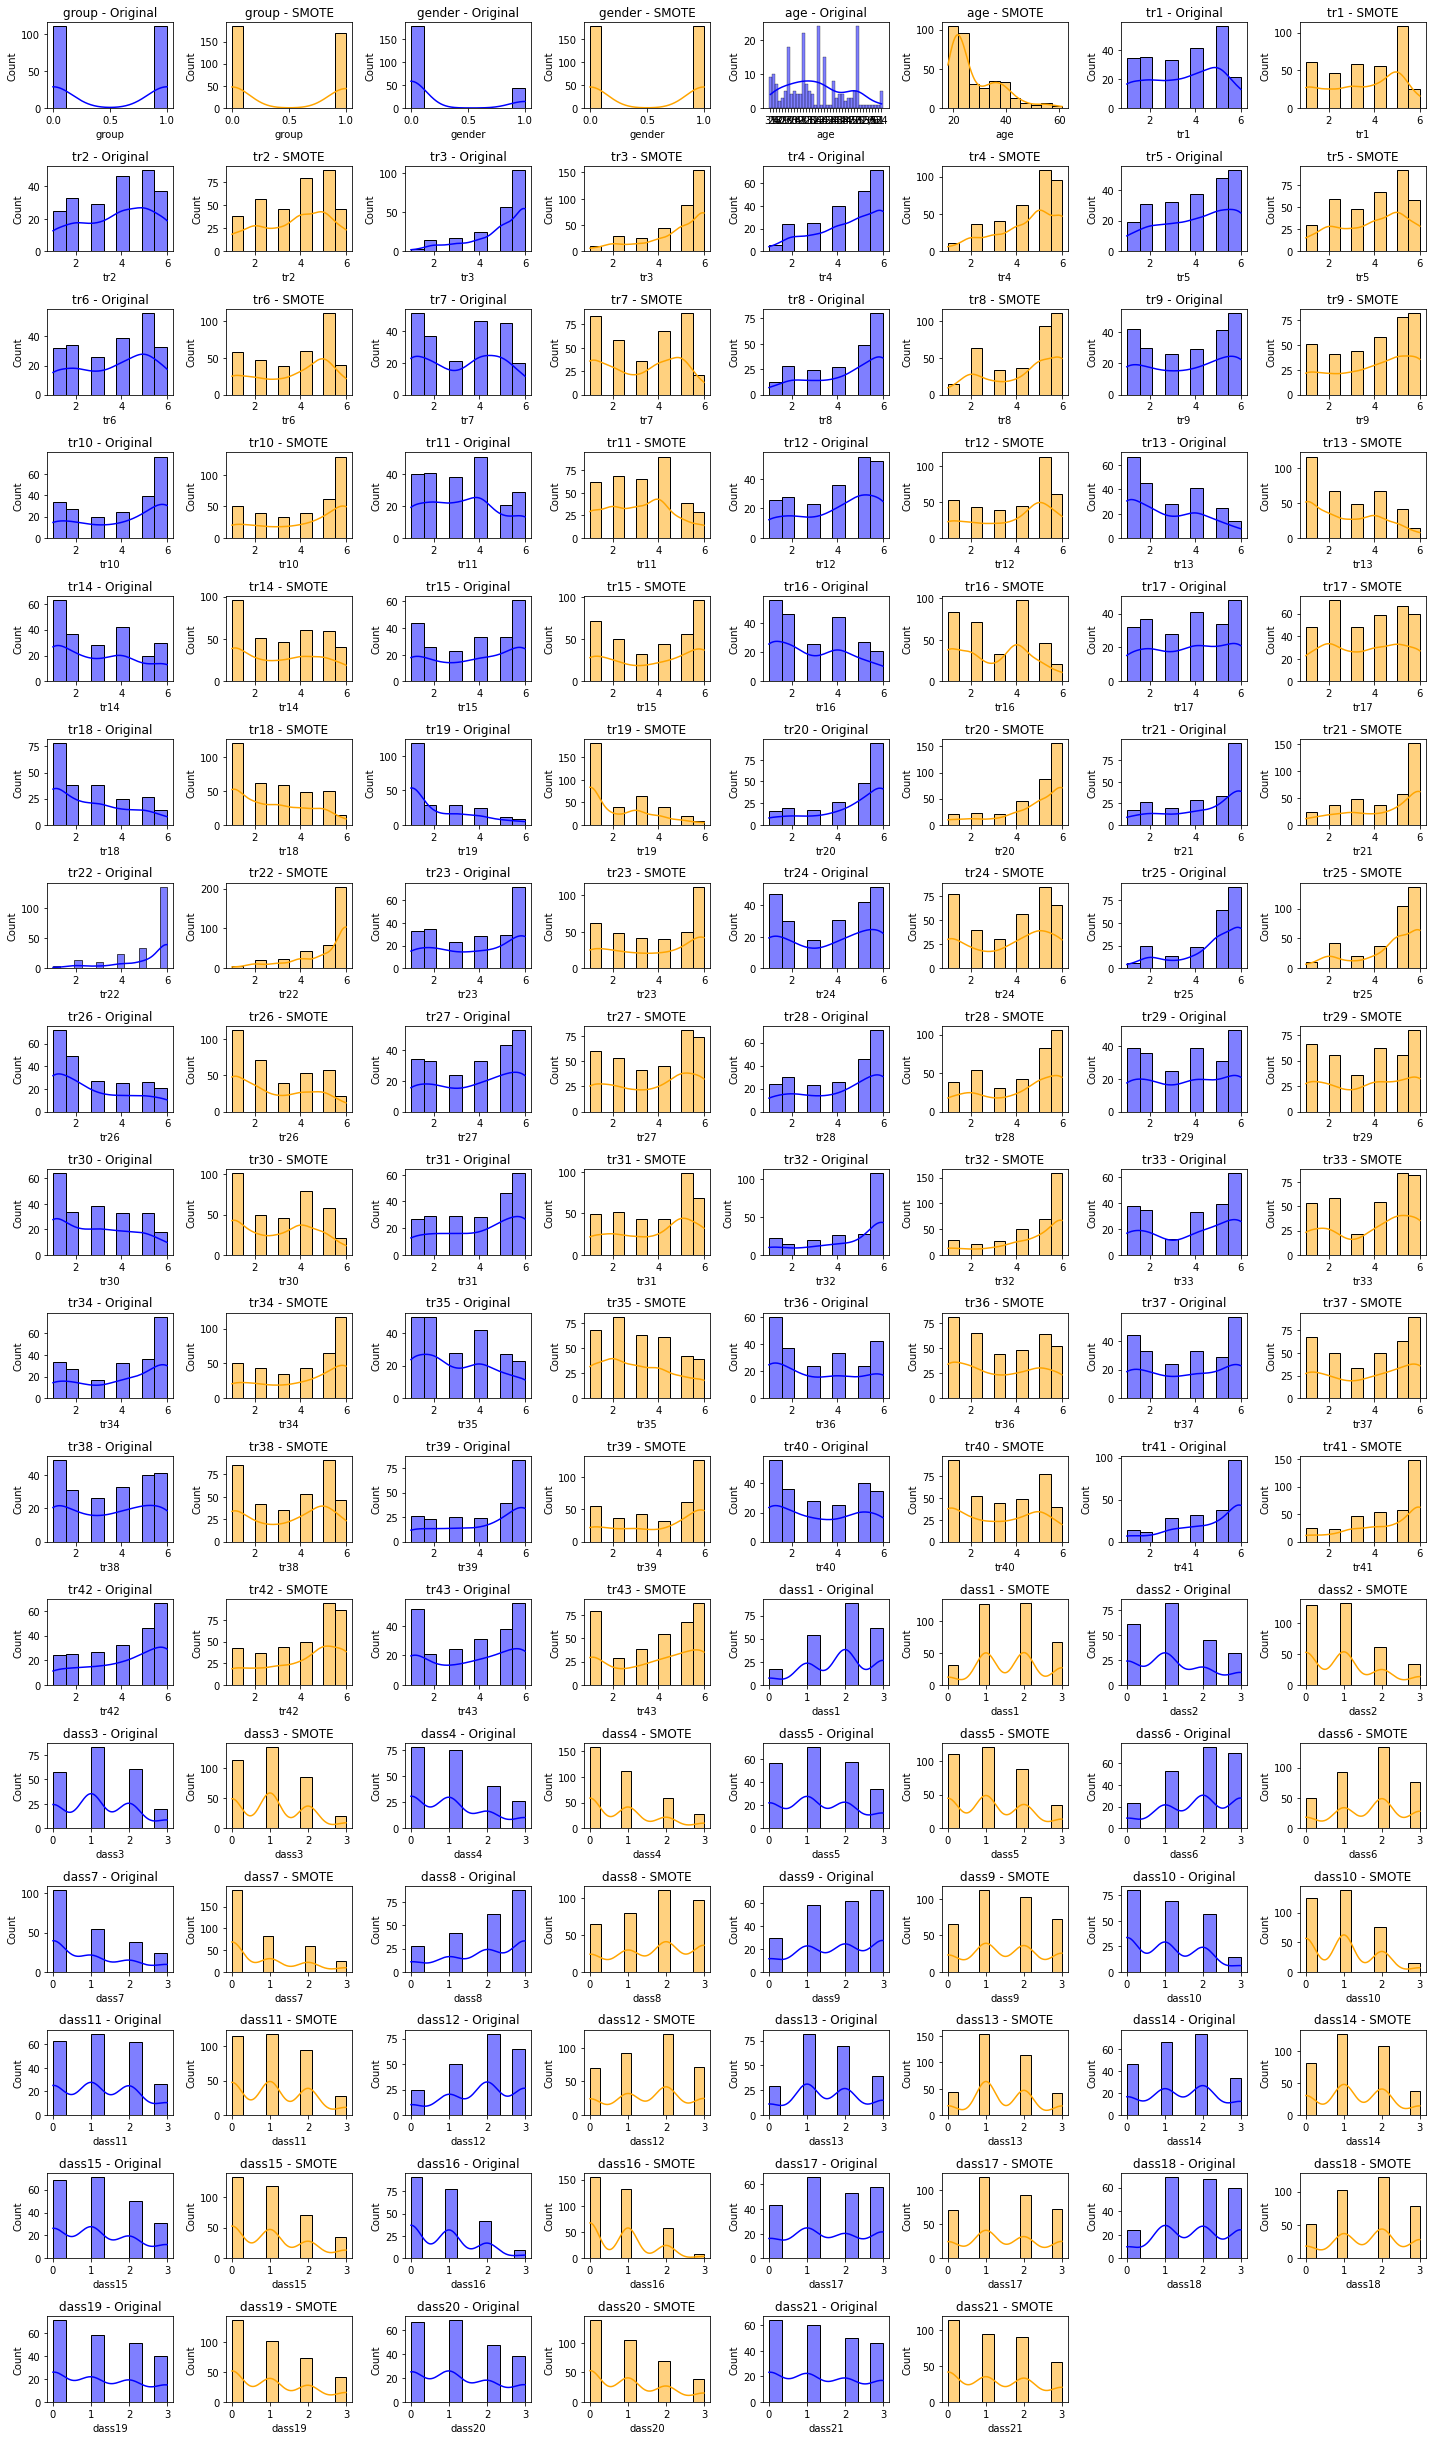

In [8]:
num_columns = len(X_resampled.columns)
num_plots_per_row = 4  # Number of plots to display per row

# Calculate the number of rows needed
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row * 2, figsize=(20, 2 * num_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Iterate through columns and plot histograms
for i, column in enumerate(X_resampled.columns):
    ax1 = axes[i * 2]
    ax2 = axes[i * 2 + 1]
    
    sns.histplot(df[column], ax=ax1, color='blue', kde=True)
    ax1.set_title(f'{column} - Original')
    
    sns.histplot(X_resampled[column], ax=ax2, color='orange', kde=True)
    ax2.set_title(f'{column} - SMOTE')
    
# Hide empty subplots
for j in range(num_columns * 2, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

In [9]:
df = X_resampled.copy()

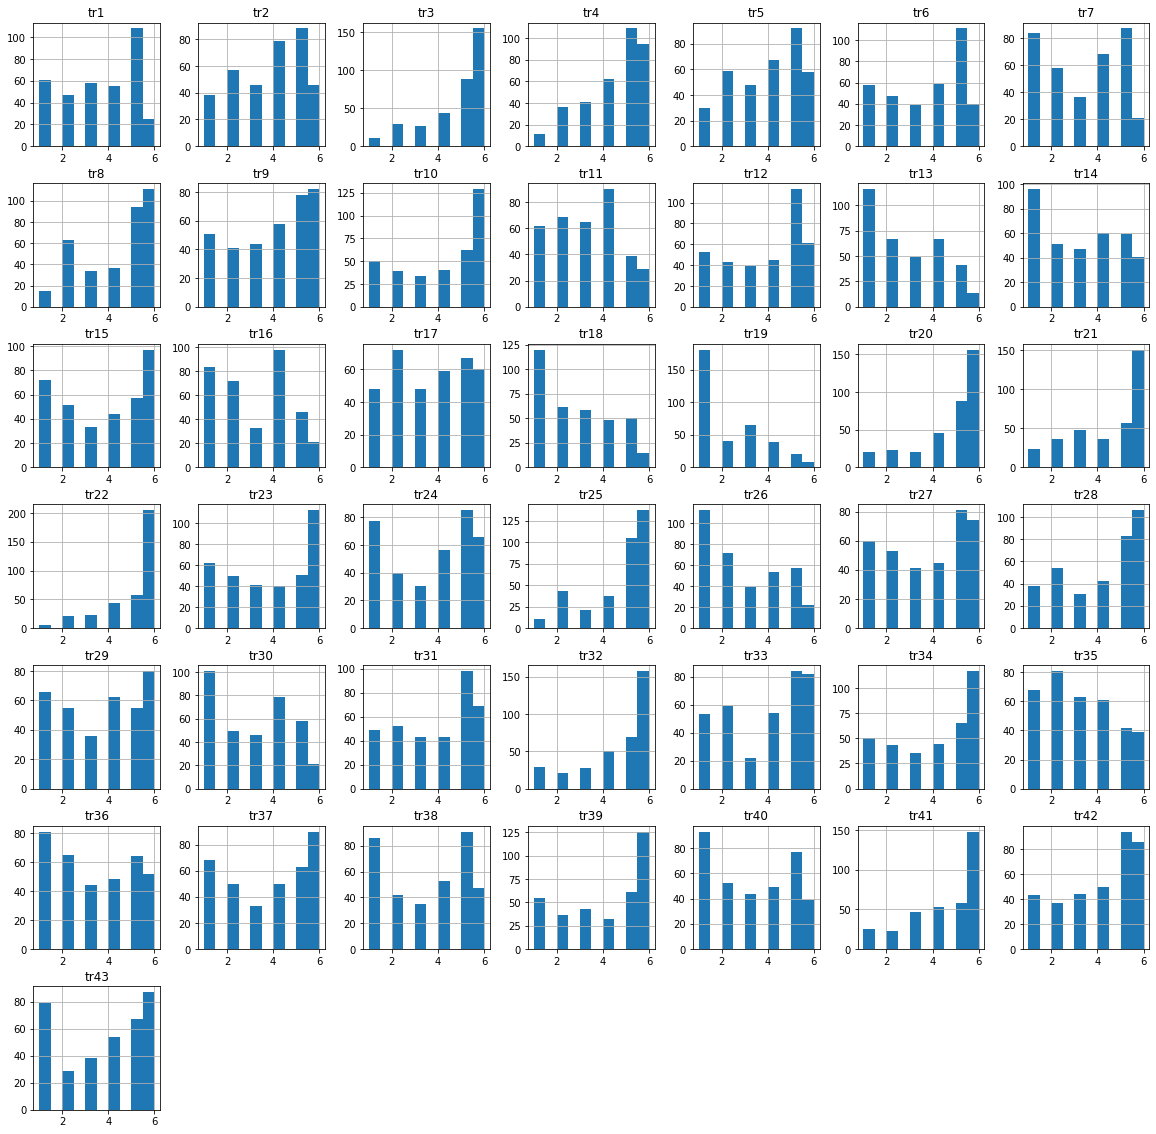

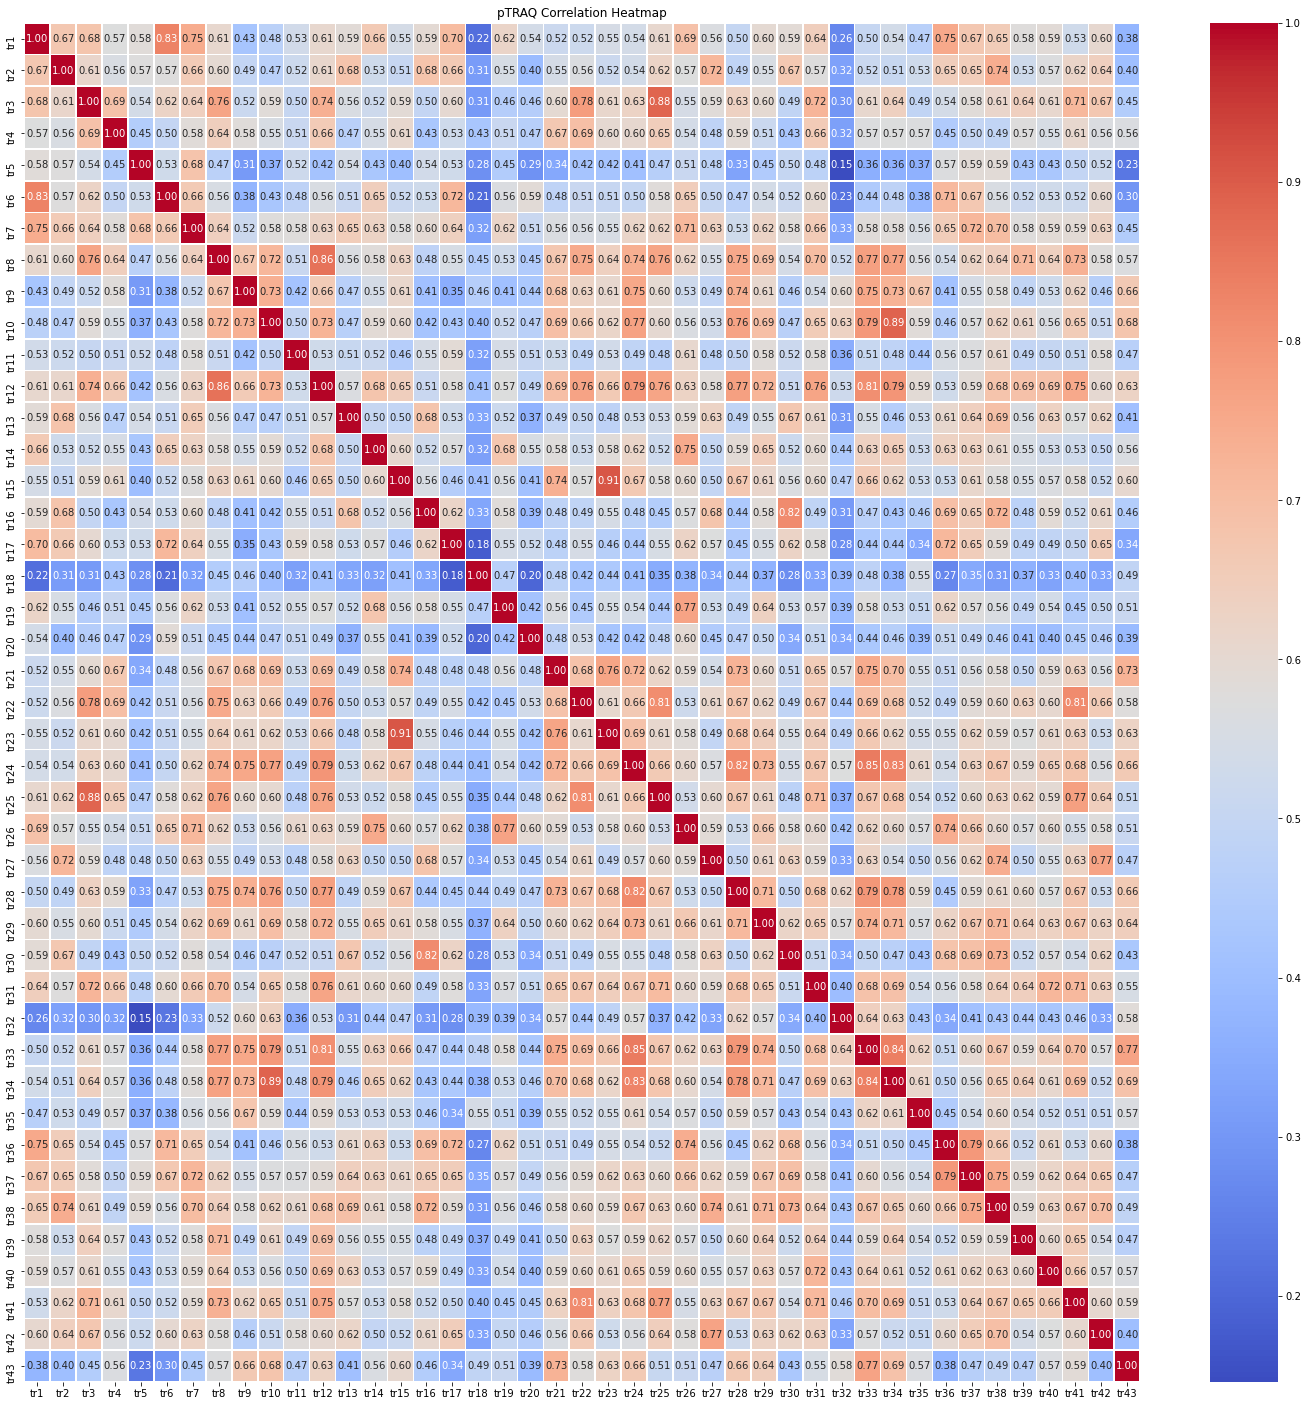

In [10]:
df_tr = df.filter(regex='tr')
df_tr.hist(figsize=(20,20))

# pTRAQ correlation matrix
df_tr_corr = df_tr.corr()
# correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df_tr_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('pTRAQ Correlation Heatmap')
plt.show()

In [11]:
positively_correlated_features, negatively_correlated_features = get_strongly_correlated_features(df.filter(regex='tr'), threshold=0.7)
print("Positively correlated features:", positively_correlated_features)
print("Negatively correlated features:", negatively_correlated_features)


Positively correlated features: [('tr1', 'tr6'), ('tr1', 'tr7'), ('tr3', 'tr8'), ('tr8', 'tr10'), ('tr9', 'tr10'), ('tr3', 'tr12'), ('tr8', 'tr12'), ('tr10', 'tr12'), ('tr1', 'tr17'), ('tr6', 'tr17'), ('tr15', 'tr21'), ('tr3', 'tr22'), ('tr8', 'tr22'), ('tr12', 'tr22'), ('tr15', 'tr23'), ('tr21', 'tr23'), ('tr8', 'tr24'), ('tr9', 'tr24'), ('tr10', 'tr24'), ('tr12', 'tr24'), ('tr21', 'tr24'), ('tr3', 'tr25'), ('tr8', 'tr25'), ('tr12', 'tr25'), ('tr22', 'tr25'), ('tr7', 'tr26'), ('tr14', 'tr26'), ('tr19', 'tr26'), ('tr2', 'tr27'), ('tr8', 'tr28'), ('tr9', 'tr28'), ('tr10', 'tr28'), ('tr12', 'tr28'), ('tr21', 'tr28'), ('tr24', 'tr28'), ('tr12', 'tr29'), ('tr24', 'tr29'), ('tr28', 'tr29'), ('tr16', 'tr30'), ('tr3', 'tr31'), ('tr8', 'tr31'), ('tr12', 'tr31'), ('tr25', 'tr31'), ('tr8', 'tr33'), ('tr9', 'tr33'), ('tr10', 'tr33'), ('tr12', 'tr33'), ('tr21', 'tr33'), ('tr24', 'tr33'), ('tr28', 'tr33'), ('tr29', 'tr33'), ('tr8', 'tr34'), ('tr9', 'tr34'), ('tr10', 'tr34'), ('tr12', 'tr34'), ('tr2

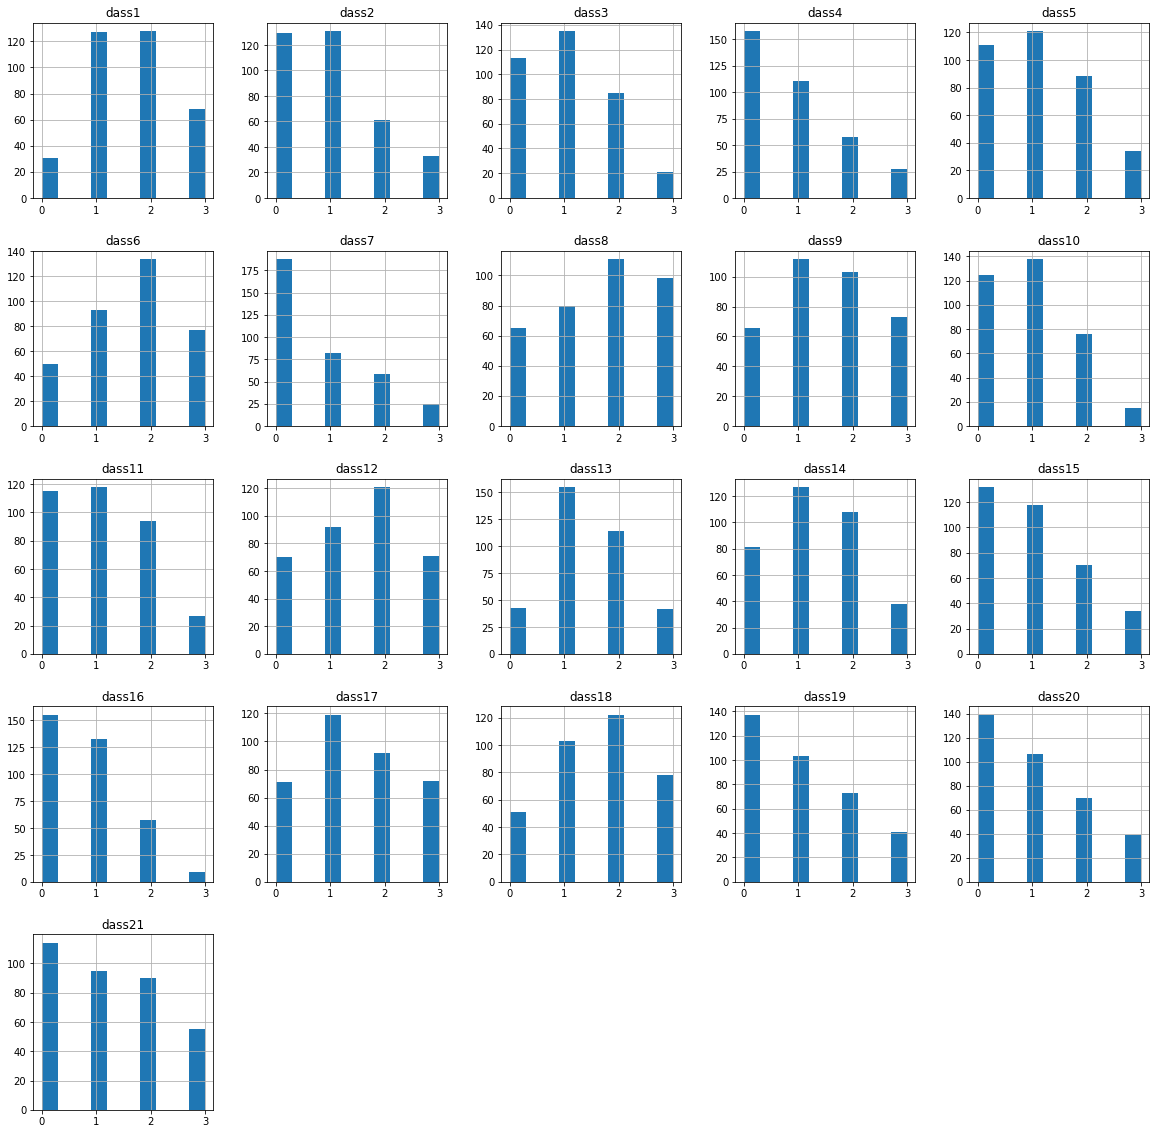

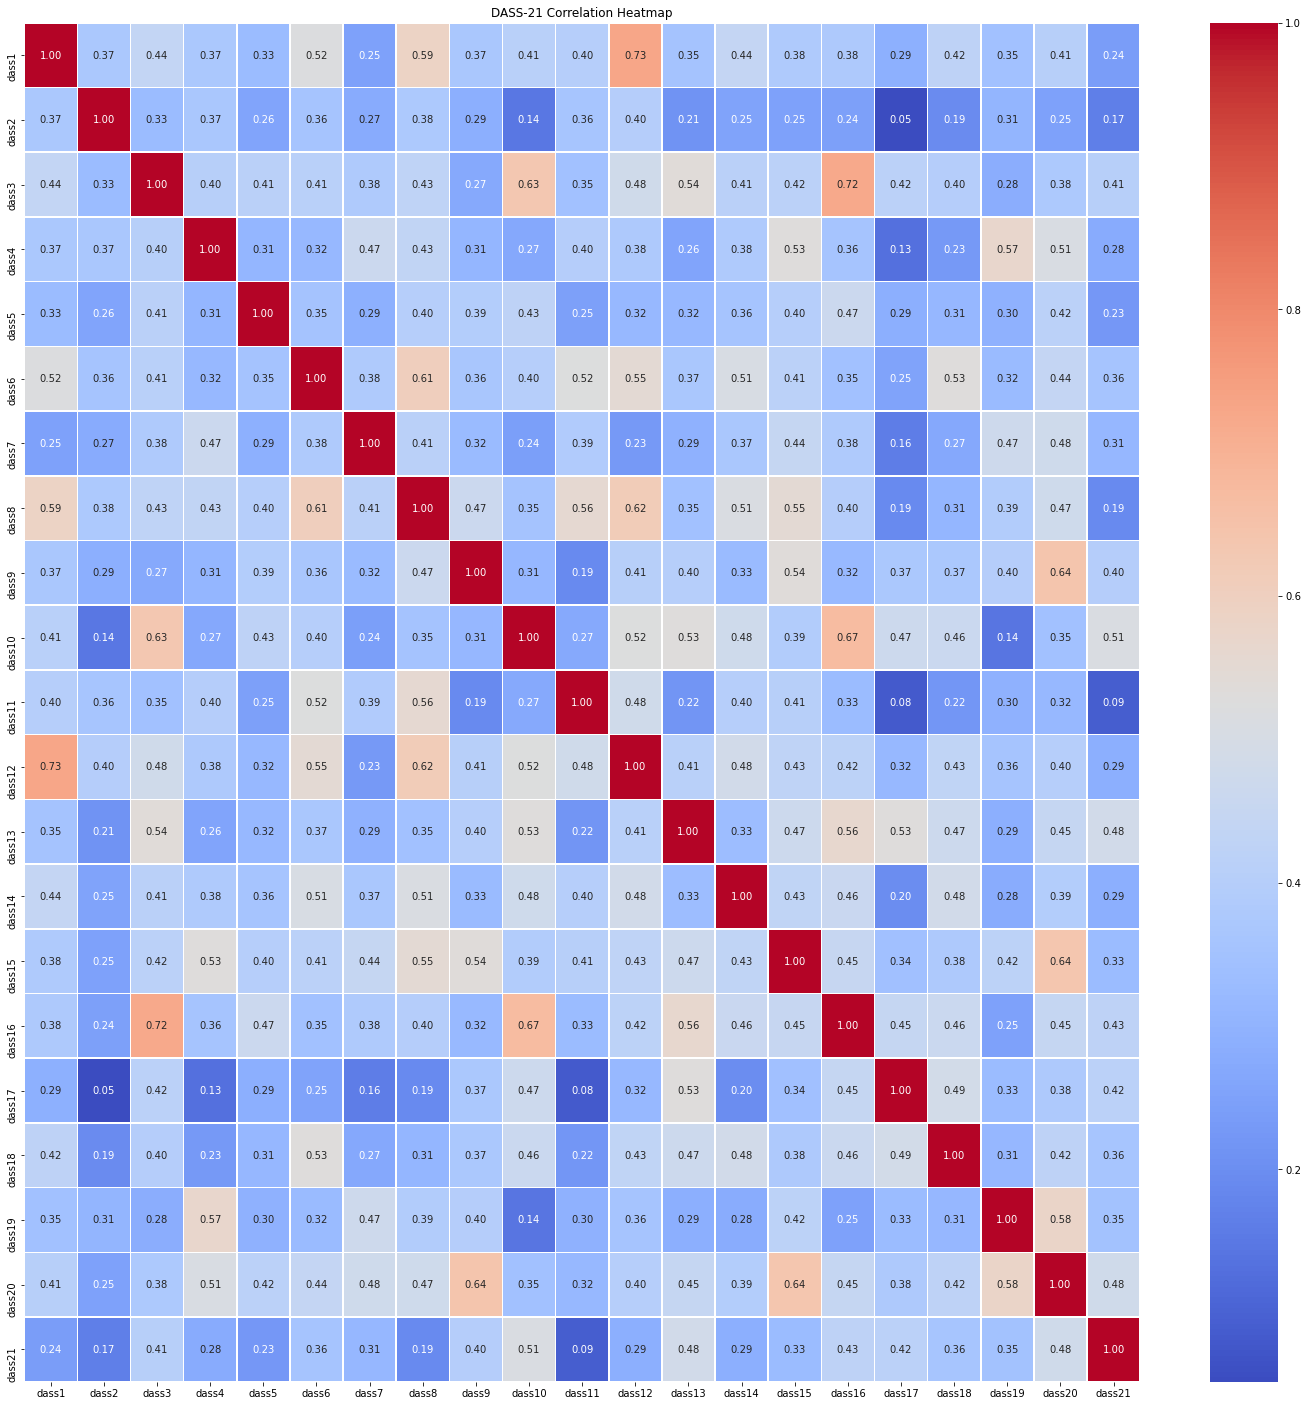

In [12]:
df_dass = df.filter(regex='dass')
df_dass.hist(figsize=(20,20))

# DASS-21 correlation matrix
df_dass_corr = df_dass.corr()
# correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df_dass_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('DASS-21 Correlation Heatmap')
plt.show()

In [13]:
positively_correlated_features, negatively_correlated_features = get_strongly_correlated_features(df.filter(regex='dass'), threshold=0.7)
print("Positively correlated features:", positively_correlated_features)
print("Negatively correlated features:", negatively_correlated_features)

Positively correlated features: [('dass1', 'dass12'), ('dass3', 'dass16')]
Negatively correlated features: []


In [14]:
# pTRAQ questions
# load the pTRAQ questions description CSV dataset file into a DataFrame
ptraq_questions = pd.read_csv('pTRAQ_questions.csv', sep=';')
# drop last row
ptraq_questions.drop(ptraq_questions.index[-1], inplace=True) 

In [15]:
# add a column corresponding to the questionnaire dataset 
ptraq_questions = ptraq_questions.assign(question_code=[f'tr{i}' for i in range(1,43+1)])

In [16]:
dsm5_criteria = pd.read_csv('DSM5_ADHD_criteria.csv', sep=';')
# add columns with corresponding DSM-5 criteria and symptom category to pTRAQ questions
ptraq_questions = ptraq_questions.assign(dsm5_criteria=[c for c in dsm5_criteria['criteria_text']])
ptraq_questions = ptraq_questions.assign(symptom_category=[c for c in dsm5_criteria['category']])

ptraq_questions.head()

,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
0,A,A1,pTRAQ1,Je ne prête pas vraiment attention aux détails,I don't really pay attention to details,tr1,Often fails to give close attention to details...,inattention
1,A,A2,pTRAQ2,On me reproche des imprécisions dans mon travail,I have been accused of inaccuracies in my work,tr2,Often fails to give close attention to details...,inattention
2,A,A3,pTRAQ3,Je fais souvent des fautes d’étourderie dans m...,I often make careless mistakes in my activities,tr3,Often fails to give close attention to details...,inattention
3,B,B1,pTRAQ4,J’ai du mal à maintenir mon attention au travail,I have trouble maintaining my attention at work.,tr4,Often has difficulty sustaining attention in t...,inattention
4,B,B2,pTRAQ5,J’ai des difficultés à rester concentré pendan...,I have difficulty staying focused while readin...,tr5,Often has difficulty sustaining attention in t...,inattention


In [17]:
# DASS-21 questionnaire questions
dass21_questions = pd.read_csv('DASS21_questions.csv', sep=';')
# add a column corresponding to the questionnaire dataset 
dass21_questions = dass21_questions.assign(question_code=[f'dass{i}' for i in range(1,21+1)])
dass21_questions.head()

,question number,area,question,question_code
0,1,stress,I found it hard to wind down,dass1
1,2,anxiety,I was aware of dryness of my mouth,dass2
2,3,depression,I couldn’t seem to experience any positive fee...,dass3
3,4,anxiety,I experienced breathing difficulty (e.g. exces...,dass4
4,5,depression,I found it difficult to work up the initiative...,dass5


pTRAQ questionnaire has a scale of 6-points Osgood-style scale, ranging from 1 “Don’t look like me at all.” to 6 “Looks just like me.”
Given that all the questions describe a prevalence of an ADHD symptom, the higher the score the bigger the chance that a person has ADHD.

Given 43 questions and a maximum score of 6 for each, the maximum score for the questionnaire is 258

In [18]:
# score the pTRAQ questionnaire
df_tr = df.filter(regex='^tr\d+$')
df['pTRAQ_score'] = df_tr.sum(axis=1)

df.head()

,group,gender,age,tr1,tr2,tr3,tr4,tr5,tr6,tr7,...,dass13,dass14,dass15,dass16,dass17,dass18,dass19,dass20,dass21,pTRAQ_score
0,1,0,35.0,5,6,5,3,6,4,5,...,3,3,1,1,2,2,1,1,2,156
1,1,1,25.0,5,3,5,5,6,4,5,...,0,0,0,0,0,2,0,0,0,203
2,1,1,18.0,5,5,6,5,5,6,4,...,2,3,2,2,1,3,2,2,2,204
3,1,1,40.0,6,6,6,6,5,6,6,...,1,1,0,0,1,1,1,1,3,245
4,1,0,29.0,4,6,6,6,3,6,4,...,3,2,2,2,3,1,0,0,1,220


DASS-21:

The rating scale is as follows:
0 Did not apply to me at all
1 Applied to me to some degree, or some of the time
2 Applied to me to a considerable degree or a good part of time
3 Applied to me very much or most of the time

NB Scores on the DASS-21 will need to be multiplied by 2 to calculate the final score.

Recommended cut-off scored for conventional severity labels (normal, moderate, severe) are as follows:
| Severity Label      | Depression | Anxiety | Stress |
|---------------------|------------|---------|--------|
| Normal              | 0-9        | 0-7     | 0-14   |
| Mild                | 10-13      | 8-9     | 15-18  |
| Moderate            | 14-20      | 10-14   | 19-25  |
| Severe              | 21-27      | 15-19   | 26-33  |
| Extremely Severe    | 28+        | 20+     | 34+    |


Source: https://www.bristol.ac.uk/media-library/sites/sps/documents/c-change/dass.pdf

In [19]:
append_dass21_scores(df, dass21_questions)
append_dass21_severity_labels(df)
df.head(5)

,group,gender,age,tr1,tr2,tr3,tr4,tr5,tr6,tr7,...,dass21,pTRAQ_score,dass21_depression_score,dass21_anxiety_score,dass21_stress_score,dass21_score,dass21_depression_label,dass21_anxiety_label,dass21_stress_label,dass21_label
0,1,0,35.0,5,6,5,3,6,4,5,...,2,156,30,14,38,82,Extremely Severe,Moderate,Extremely Severe,Extremely Severe
1,1,1,25.0,5,3,5,5,6,4,5,...,0,203,0,0,10,10,Normal,Normal,Normal,Normal
2,1,1,18.0,5,5,6,5,5,6,4,...,2,204,24,30,36,90,Severe,Extremely Severe,Extremely Severe,Extremely Severe
3,1,1,40.0,6,6,6,6,5,6,6,...,3,245,16,12,26,54,Moderate,Moderate,Severe,Moderate
4,1,0,29.0,4,6,6,6,3,6,4,...,1,220,26,10,32,68,Severe,Moderate,Severe,Severe


In [20]:
# split the dataset into adhd and not adhd group
mixed_adhd_df = df[df['group'] == 1] 
mixed_no_adhd_df = df[df['group'] == 0] 

# split the dataset by gender
women_df = df[df['gender'] == 0]
men_df = df[df['gender'] == 1]

# split the data further by gender
women_adhd_df = mixed_adhd_df[mixed_adhd_df['gender'] == 0] 
men_adhd_df = mixed_adhd_df[mixed_adhd_df['gender'] == 1]
women_no_adhd_df = mixed_no_adhd_df[mixed_no_adhd_df['gender'] == 0]
men_no_adhd_df = mixed_no_adhd_df[mixed_no_adhd_df['gender'] == 1]

print(f'Gender split (female/male) of the adhd dataset: {len(women_adhd_df)}/{len(men_adhd_df)}')
print(f'Gender split (female/male) of the non adhd dataset: {len(women_no_adhd_df)}/{len(men_no_adhd_df)}')
print(f'Gender split (female/male) of the whole dataset: {len(women_df)}/{len(men_df)}')

Gender split (female/male) of the adhd dataset: 86/84
Gender split (female/male) of the non adhd dataset: 91/93
Gender split (female/male) of the whole dataset: 177/177


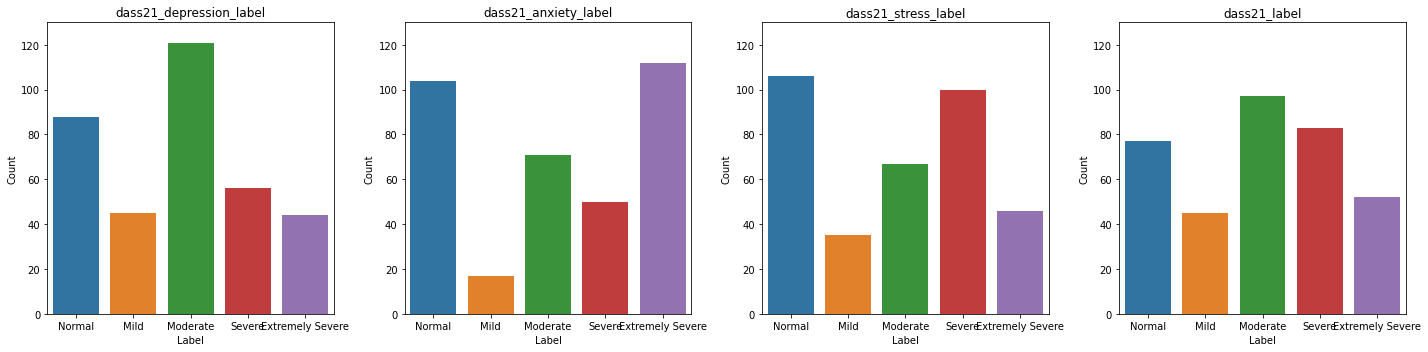

In [21]:
category_order = ['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe']
columns_to_plot = ['dass21_depression_label', 'dass21_anxiety_label', 'dass21_stress_label', 'dass21_label']
# for the entire dataset
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))
for ax, column in zip(axes, columns_to_plot):
    sns.countplot(data=df, x=column, order=category_order, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_ylim(0, 130) 
plt.tight_layout()

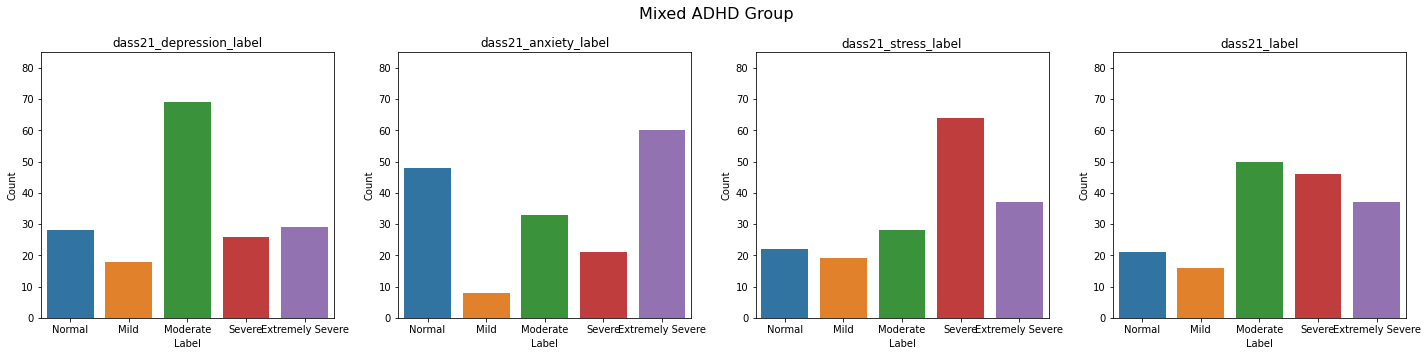

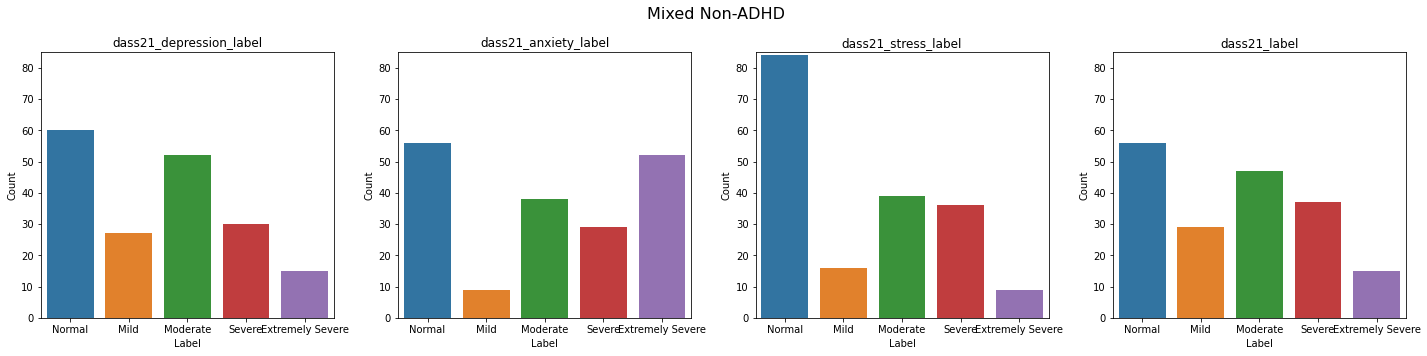

In [22]:
# Mixed ADHD Group
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))
fig.suptitle('Mixed ADHD Group', fontsize=16)
for ax, column in zip(axes, columns_to_plot):
    sns.countplot(data=mixed_adhd_df, x=column, order=category_order, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_ylim(0, 85) 
plt.tight_layout()

# Mixed Non-ADHD
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))
fig.suptitle('Mixed Non-ADHD', fontsize=16)
for ax, column in zip(axes, columns_to_plot):
    sns.countplot(data=mixed_no_adhd_df, x=column, order=category_order, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_ylim(0, 85) 
plt.tight_layout()

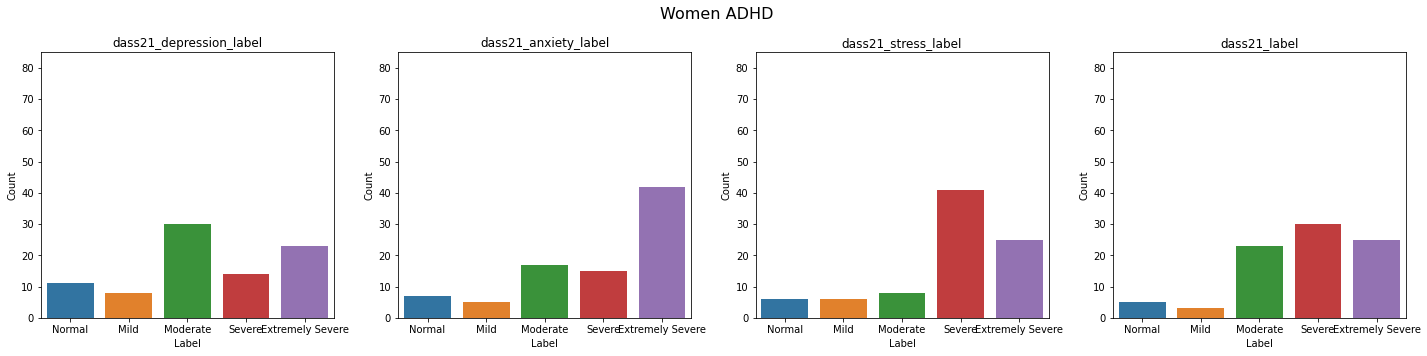

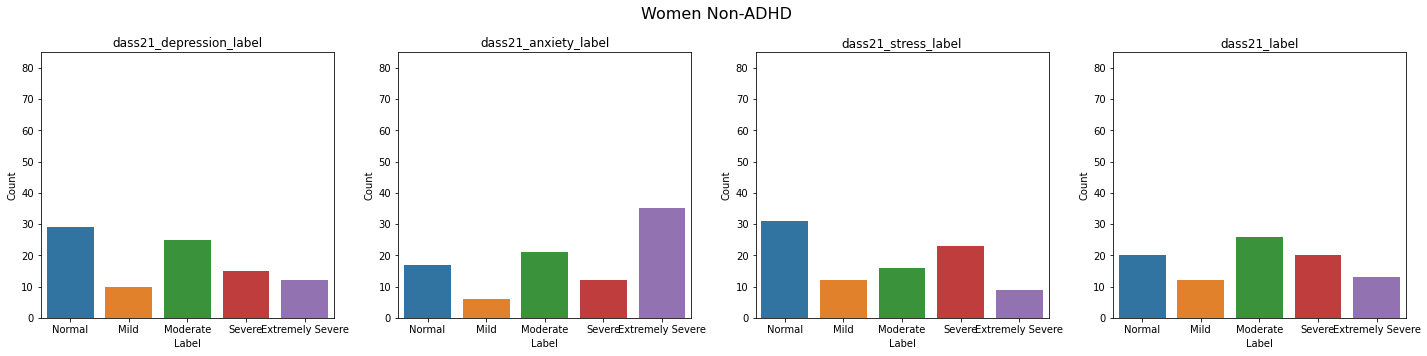

In [23]:
# Women ADHD 
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))
fig.suptitle('Women ADHD', fontsize=16)
for ax, column in zip(axes, columns_to_plot):
    sns.countplot(data=women_adhd_df, x=column, order=category_order, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_ylim(0, 85) 
plt.tight_layout()

# Women Non-ADHD
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))
fig.suptitle('Women Non-ADHD', fontsize=16)
for ax, column in zip(axes, columns_to_plot):
    sns.countplot(data=women_no_adhd_df, x=column, order=category_order, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_ylim(0, 85) 
plt.tight_layout()

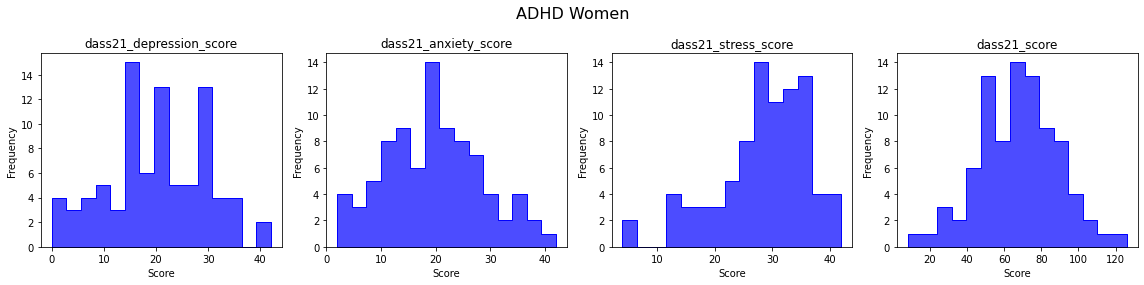

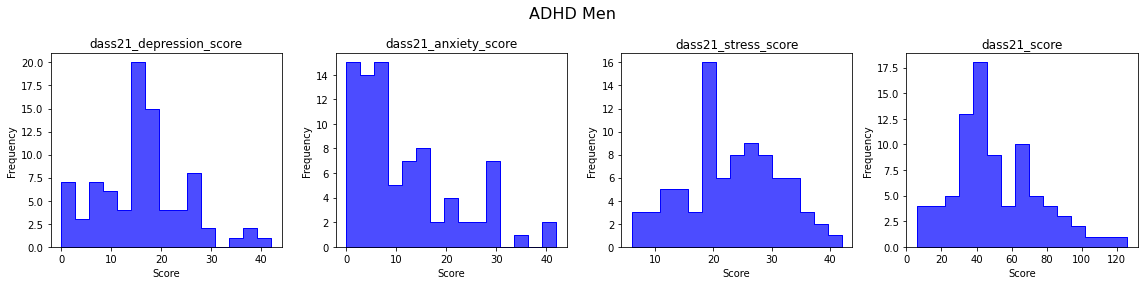

In [24]:
score_columns = ['dass21_depression_score', 'dass21_anxiety_score', 'dass21_stress_score', 'dass21_score']
# Plot histograms for ADHD women
plt.figure(figsize=(16, 4))
plt.suptitle('ADHD Women', fontsize=16)
for i, column in enumerate(score_columns):
    plt.subplot(1, len(score_columns), i+1)
    sns.histplot(data=women_adhd_df, x=column, bins=15, color='blue', alpha=0.7, element='step')
    plt.title(column, fontsize=12)
    plt.xlabel('Score', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.tight_layout()
plt.show()

# Plot histograms for ADHD men
plt.figure(figsize=(16, 4))
plt.suptitle('ADHD Men', fontsize=16)
for i, column in enumerate(score_columns):
    plt.subplot(1, len(score_columns), i+1)
    sns.histplot(data=men_adhd_df, x=column, bins=15, color='blue', alpha=0.7, element='step')
    plt.title(column, fontsize=12)
    plt.xlabel('Score', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.tight_layout()
plt.show()

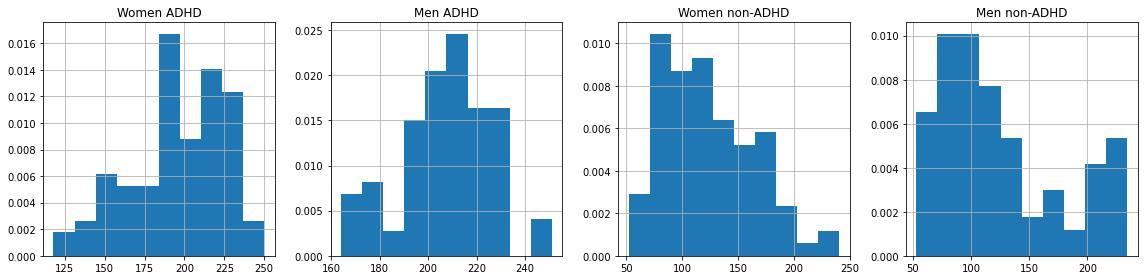

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# normalised histogram for pTRAQ scores for adhd women
women_adhd_df['pTRAQ_score'].hist(ax=axes[0],density=True)
axes[0].set_title('Women ADHD')
# normalised histogram for pTRAQ scores for adhd men
men_adhd_df['pTRAQ_score'].hist(ax=axes[1],density=True)
axes[1].set_title('Men ADHD')
# normalised histogram for pTRAQ scores for non-adhd women
women_no_adhd_df['pTRAQ_score'].hist(ax=axes[2],density=True)
axes[2].set_title('Women non-ADHD')
# normalised histogram for pTRAQ scores for non-adhd men
men_no_adhd_df['pTRAQ_score'].hist(ax=axes[3],density=True)
axes[3].set_title('Men non-ADHD')
# Adjust layout
plt.tight_layout()

In [26]:
score_columns = ['pTRAQ_score', 'dass21_depression_score', 'dass21_anxiety_score', 'dass21_stress_score', 'dass21_score']

women_adhd_desc = women_adhd_df.filter(regex='_score').describe()
men_adhd_desc = men_adhd_df.filter(regex='_score').describe()
women_no_adhd_desc = women_no_adhd_df.filter(regex='_score').describe()
men_no_adhd_desc = men_no_adhd_df.filter(regex='_score').describe()

pTRAQ_score_df = pd.concat([women_adhd_desc['pTRAQ_score'], men_adhd_desc['pTRAQ_score'], women_no_adhd_desc['pTRAQ_score'], men_no_adhd_desc['pTRAQ_score']], axis=1)
pTRAQ_score_df.columns = ['women_adhd', 'men_adhd', 'women_no_adhd', 'men_no_adhd']
dass_d_score_df = pd.concat([women_adhd_desc['dass21_depression_score'], men_adhd_desc['dass21_depression_score'], women_no_adhd_desc['dass21_depression_score'], men_no_adhd_desc['dass21_depression_score']], axis=1)
dass_d_score_df.columns = ['women_adhd', 'men_adhd', 'women_no_adhd', 'men_no_adhd']
dass_a_score_df = pd.concat([women_adhd_desc['dass21_anxiety_score'], men_adhd_desc['dass21_anxiety_score'], women_no_adhd_desc['dass21_anxiety_score'], men_no_adhd_desc['dass21_anxiety_score']], axis=1)
dass_a_score_df.columns = ['women_adhd', 'men_adhd', 'women_no_adhd', 'men_no_adhd']
dass_s_score_df = pd.concat([women_adhd_desc['dass21_score'], men_adhd_desc['dass21_score'], women_no_adhd_desc['dass21_score'], men_no_adhd_desc['dass21_score']], axis=1)
dass_s_score_df.columns = ['women_adhd', 'men_adhd', 'women_no_adhd', 'men_no_adhd']


In [27]:
print('pTRAQ score - Descriptive Statistics')
pTRAQ_score_df

pTRAQ score - Descriptive Statistics


,women_adhd,men_adhd,women_no_adhd,men_no_adhd
count,86.000000,84.00000,91.000000,93.000000
mean,196.534884,206.97619,123.153846,124.397849
std,29.539086,18.36181,42.238982,52.468653
min,118.000000,164.00000,52.000000,53.000000
25%,178.250000,197.00000,89.000000,86.000000
50%,197.500000,209.50000,116.000000,108.000000
75%,219.750000,219.00000,153.000000,159.000000
max,250.000000,251.00000,241.000000,234.000000


In [28]:
print('DASS-21 depression score - Descriptive Statistics')
dass_d_score_df

DASS-21 depression score - Descriptive Statistics


,women_adhd,men_adhd,women_no_adhd,men_no_adhd
count,86.000000,84.000000,91.000000,93.000000
mean,19.813953,15.857143,15.692308,13.161290
std,9.626571,8.801893,10.197704,8.221513
min,0.000000,0.000000,0.000000,0.000000
25%,14.000000,10.000000,7.000000,6.000000
50%,20.000000,16.000000,16.000000,12.000000
75%,28.000000,20.000000,23.000000,18.000000
max,42.000000,42.000000,40.000000,32.000000


In [29]:
print('DASS-21 anxiety score - Descriptive Statistics')
dass_a_score_df

DASS-21 anxiety score - Descriptive Statistics


,women_adhd,men_adhd,women_no_adhd,men_no_adhd
count,86.000000,84.000000,91.000000,93.000000
mean,19.372093,11.523810,16.637363,10.602151
std,8.961416,10.215127,9.479236,8.396609
min,2.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,9.000000,2.000000
50%,18.000000,8.000000,16.000000,10.000000
75%,24.000000,16.000000,24.000000,18.000000
max,42.000000,42.000000,36.000000,30.000000


In [30]:
print('DASS-21 stress score - Descriptive Statistics')
dass_s_score_df

DASS-21 stress score - Descriptive Statistics


,women_adhd,men_adhd,women_no_adhd,men_no_adhd
count,86.000000,84.000000,91.000000,93.000000
mean,67.581395,50.357143,52.681319,37.419355
std,21.457737,24.745764,25.005279,22.775999
min,8.000000,6.000000,10.000000,2.000000
25%,54.000000,34.000000,35.000000,14.000000
50%,68.000000,44.000000,52.000000,38.000000
75%,81.500000,66.500000,72.000000,56.000000
max,126.000000,126.000000,110.000000,84.000000


In [31]:
women_df_desc = women_df.filter(regex='_score').describe()
print('Women Descriptive Statistics')
women_df_desc

Women Descriptive Statistics


,pTRAQ_score,dass21_depression_score,dass21_anxiety_score,dass21_stress_score,dass21_score
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,158.807910,17.694915,17.966102,24.259887,59.920904
std,51.831538,10.109493,9.306583,9.498817,24.451586
min,52.000000,0.000000,0.000000,4.000000,8.000000
25%,114.000000,10.000000,10.000000,16.000000,44.000000
50%,162.000000,18.000000,18.000000,26.000000,58.000000
75%,199.000000,24.000000,24.000000,32.000000,76.000000
max,250.000000,42.000000,42.000000,42.000000,126.000000


In [32]:
men_df_desc = men_df.filter(regex='_score').describe()
print('Men Descriptive Statistics')
men_df_desc

Men Descriptive Statistics


,pTRAQ_score,dass21_depression_score,dass21_anxiety_score,dass21_stress_score,dass21_score
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,163.587571,14.440678,11.039548,18.079096,43.559322
std,57.516050,8.584350,9.288533,10.050693,24.534024
min,53.000000,0.000000,0.000000,0.000000,2.000000
25%,106.000000,8.000000,4.000000,10.000000,26.000000
50%,189.000000,14.000000,10.000000,20.000000,42.000000
75%,213.000000,20.000000,18.000000,26.000000,60.000000
max,251.000000,42.000000,42.000000,42.000000,126.000000


In [54]:
# get correlation of tr questions (1-6) to adhd diagnosis (0, 1)
# adhd group 1
# non-adhd group 0


# all data
question_cols = df.filter(regex='^tr\d+$').columns
correlations = []
p_values = []

for col in question_cols:
    corr, p_value = stats.pointbiserialr(df['group'], df[col])
    correlations.append(corr)
    p_values.append(p_value.round(3))

correlation_df = pd.DataFrame({
    'Question': question_cols,
    'Correlation': correlations,
    'P-value': p_values
})

corr_df = correlation_df.sort_values(by='Correlation', ascending=False)#[:10]
corr_df = pd.merge(corr_df, ptraq_questions, left_on='Question', right_on='question_code', how='inner')
corr_df[:15]

,Question,Correlation,P-value,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
0,tr24,0.702150,0.0,I,I1,pTRAQ24,Je suis souvent sujet à des oublis dans ma vie...,I am often subject to forgetfulness in my dail...,tr24,"Is often forgetful in daily activities (e.g., ...",inattention
1,tr21,0.649743,0.0,H,H1,pTRAQ21,Je suis facilement distrait par mon environnement,I am easily distracted by my environment,tr21,Is often easily distracted by extraneous stimu...,inattention
2,tr33,0.641251,0.0,d,D1,pTRAQ33,J’ai du mal à tenir en place lorsque la situat...,I find it hard to stay in place when the situa...,tr33,Often unable to play or engage in leisure acti...,hyperactivity/impulsivity
3,tr28,0.640377,0.0,b,b1,pTRAQ28,Je quitte souvent ma place sans nécessité lors...,I often leave my seat unnecessarily during a m...,tr28,Often leaves seat in situations when remaining...,hyperactivity/impulsivity
4,tr34,0.634490,0.0,e,e1,pTRAQ34,Mon entourage trouve que je suis difficile à s...,My entourage finds me difficult to follow.,tr34,"Is often “on the go,” acting as if “driven by ...",hyperactivity/impulsivity
5,tr15,0.625153,0.0,F,F1,pTRAQ15,J’ ai tendance à éviter les taches nécessitant...,I tend to avoid tasks that require sustained m...,tr15,"Often avoids, dislikes, or is reluctant to eng...",inattention
6,tr40,0.620598,0.0,"g (h,f)","g3 (h2, f3)",pTRAQ40,Il m’est difficile d’attendre mon tour dans un...,I find it difficult to wait my turn in a conve...,tr40,Often blurts out an answer before a question h...,hyperactivity/impulsivity
7,tr31,0.614826,0.0,c,c1,pTRAQ31,Mon entourage trouve que je suis une personne ...,The people around me think that I am a restles...,tr31,Often runs about or climbs in situations where...,hyperactivity/impulsivity
8,tr12,0.612549,0.0,E,E1,pTRAQ12,J’ai des difficultés à organiser mon temps,I have difficulty organizing my time,tr12,Often has difficulty organizing tasks and acti...,inattention
9,tr8,0.611317,0.0,C,C2,pTRAQ8,"J’ai souvent l’esprit ailleurs, même en l’abse...","My mind is often elsewhere, even when there is...",tr8,Often does not seem to listen when spoken to d...,inattention


In [52]:
# get correlation of tr questions (1-6) to adhd diagnosis (0, 1)
# adhd group 1
# non-adhd group 0


# men data
question_cols = men_df.filter(regex='^tr\d+$').columns
men_correlations = []
men_p_values = []

for col in question_cols:
    corr, p_value = stats.pointbiserialr(men_df['group'], men_df[col])
    men_correlations.append(corr)
    men_p_values.append(p_value.round(3))

men_correlation_df = pd.DataFrame({
    'Question': question_cols,
    'Correlation': men_correlations,
    'P-value': men_p_values
})

men_corr_df = men_correlation_df.sort_values(by='Correlation', ascending=False)#[:10]
men_corr_df = pd.merge(men_corr_df, ptraq_questions, left_on='Question', right_on='question_code', how='inner')
men_corr_df[:15]

,Question,Correlation,P-value,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
0,tr1,0.759519,0.0,A,A1,pTRAQ1,Je ne prête pas vraiment attention aux détails,I don't really pay attention to details,tr1,Often fails to give close attention to details...,inattention
1,tr6,0.735266,0.0,B,B3,pTRAQ6,J’ai du mal à rester concentré durant les conv...,I have trouble staying focused during conversa...,tr6,Often has difficulty sustaining attention in t...,inattention
2,tr40,0.724774,0.0,"g (h,f)","g3 (h2, f3)",pTRAQ40,Il m’est difficile d’attendre mon tour dans un...,I find it difficult to wait my turn in a conve...,tr40,Often blurts out an answer before a question h...,hyperactivity/impulsivity
3,tr15,0.716986,0.0,F,F1,pTRAQ15,J’ ai tendance à éviter les taches nécessitant...,I tend to avoid tasks that require sustained m...,tr15,"Often avoids, dislikes, or is reluctant to eng...",inattention
4,tr24,0.695105,0.0,I,I1,pTRAQ24,Je suis souvent sujet à des oublis dans ma vie...,I am often subject to forgetfulness in my dail...,tr24,"Is often forgetful in daily activities (e.g., ...",inattention
5,tr21,0.694458,0.0,H,H1,pTRAQ21,Je suis facilement distrait par mon environnement,I am easily distracted by my environment,tr21,Is often easily distracted by extraneous stimu...,inattention
6,tr31,0.688678,0.0,c,c1,pTRAQ31,Mon entourage trouve que je suis une personne ...,The people around me think that I am a restles...,tr31,Often runs about or climbs in situations where...,hyperactivity/impulsivity
7,tr34,0.673466,0.0,e,e1,pTRAQ34,Mon entourage trouve que je suis difficile à s...,My entourage finds me difficult to follow.,tr34,"Is often “on the go,” acting as if “driven by ...",hyperactivity/impulsivity
8,tr12,0.668930,0.0,E,E1,pTRAQ12,J’ai des difficultés à organiser mon temps,I have difficulty organizing my time,tr12,Often has difficulty organizing tasks and acti...,inattention
9,tr28,0.659905,0.0,b,b1,pTRAQ28,Je quitte souvent ma place sans nécessité lors...,I often leave my seat unnecessarily during a m...,tr28,Often leaves seat in situations when remaining...,hyperactivity/impulsivity


In [34]:
# get correlation of tr questions (1-6) to adhd diagnosis (0, 1)
# adhd group 1
# non-adhd group 0


# women data
question_cols = women_df.filter(regex='^tr\d+$').columns
women_correlations = []
women_p_values = []

for col in question_cols:
    corr, p_value = stats.pointbiserialr(women_df['group'], women_df[col])
    women_correlations.append(corr)
    women_p_values.append(p_value.round(3))

women_correlation_df = pd.DataFrame({
    'Question': question_cols,
    'Correlation': women_correlations,
    'P-value': women_p_values
})

women_correlation_df = women_correlation_df.sort_values(by='Correlation', ascending=False)#[:10]
women_correlation_df = pd.merge(women_correlation_df, ptraq_questions, left_on='Question', right_on='question_code', how='inner')
women_correlation_df[:15]

,Question,Correlation,P-value,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
0,tr24,0.711973,0.0,I,I1,pTRAQ24,Je suis souvent sujet à des oublis dans ma vie...,I am often subject to forgetfulness in my dail...,tr24,"Is often forgetful in daily activities (e.g., ...",inattention
1,tr33,0.677268,0.0,d,D1,pTRAQ33,J’ai du mal à tenir en place lorsque la situat...,I find it hard to stay in place when the situa...,tr33,Often unable to play or engage in leisure acti...,hyperactivity/impulsivity
2,tr9,0.623841,0.0,D,D1,pTRAQ9,J’ai des difficultés à me conformer aux consignes,I have difficulty complying with instructions,tr9,Often does not follow through on instructions ...,inattention
3,tr28,0.620967,0.0,b,b1,pTRAQ28,Je quitte souvent ma place sans nécessité lors...,I often leave my seat unnecessarily during a m...,tr28,Often leaves seat in situations when remaining...,hyperactivity/impulsivity
4,tr21,0.612571,0.0,H,H1,pTRAQ21,Je suis facilement distrait par mon environnement,I am easily distracted by my environment,tr21,Is often easily distracted by extraneous stimu...,inattention
5,tr8,0.607056,0.0,C,C2,pTRAQ8,"J’ai souvent l’esprit ailleurs, même en l’abse...","My mind is often elsewhere, even when there is...",tr8,Often does not seem to listen when spoken to d...,inattention
6,tr43,0.600670,0.0,i,i2,pTRAQ43,Je m’impose souvent dans les conversations.,I often impose myself in conversations.,tr43,"Often interrupts or intrudes on others (e.g., ...",hyperactivity/impulsivity
7,tr34,0.598696,0.0,e,e1,pTRAQ34,Mon entourage trouve que je suis difficile à s...,My entourage finds me difficult to follow.,tr34,"Is often “on the go,” acting as if “driven by ...",hyperactivity/impulsivity
8,tr4,0.586729,0.0,B,B1,pTRAQ4,J’ai du mal à maintenir mon attention au travail,I have trouble maintaining my attention at work.,tr4,Often has difficulty sustaining attention in t...,inattention
9,tr10,0.568914,0.0,D,D2,pTRAQ10,J’ai des difficultés à mener mes tâches (profe...,"I have difficulty completing my tasks (work, h...",tr10,Often does not follow through on instructions ...,inattention


In [35]:
# get correlation of dass questions (0-3) to adhd diagnosis (0, 1)
# adhd group 1
# non-adhd group 0


# men data
question_cols = men_df.filter(regex='^dass\d+$').columns
men_correlations = []
men_p_values = []

for col in question_cols:
    corr, p_value = stats.pointbiserialr(men_df['group'], men_df[col])
    men_correlations.append(corr)
    men_p_values.append(p_value.round(3))

men_correlation_df = pd.DataFrame({
    'Question': question_cols,
    'Correlation': men_correlations,
    'P-value': men_p_values
})

men_correlation_df = men_correlation_df.sort_values(by='Correlation', ascending=False)#[:10]
men_correlation_df = pd.merge(men_correlation_df, dass21_questions, left_on='Question', right_on='question_code', how='inner')
men_correlation_df[:15]

,Question,Correlation,P-value,question number,area,question,question_code
0,dass1,0.447405,0.000,1,stress,I found it hard to wind down,dass1
1,dass6,0.403524,0.000,6,stress,I tended to over-react to situations,dass6
2,dass11,0.384114,0.000,11,stress,I found myself getting agitated,dass11
3,dass12,0.382665,0.000,12,stress,I found it difficult to relax,dass12
4,dass8,0.378478,0.000,8,stress,I felt that I was using a lot of nervous energy,dass8
5,dass14,0.308457,0.000,14,stress,I was intolerant of anything that kept me from...,dass14
6,dass10,0.299866,0.000,10,depression,I felt that I had nothing to look forward to,dass10
7,dass2,0.266920,0.000,2,anxiety,I was aware of dryness of my mouth,dass2
8,dass15,0.253143,0.001,15,anxiety,I felt I was close to panic,dass15
9,dass18,0.245427,0.001,18,stress,I felt that I was rather touchy,dass18


In [37]:
# get correlation of dass questions (0-3) to adhd diagnosis (0, 1)
# adhd group 1
# non-adhd group 0


# women data
question_cols = women_df.filter(regex='^dass\d+$').columns
women_correlations = []
women_p_values = []

for col in question_cols:
    corr, p_value = stats.pointbiserialr(women_df['group'], women_df[col])
    women_correlations.append(corr)
    women_p_values.append(p_value.round(3))

women_correlation_df = pd.DataFrame({
    'Question': question_cols,
    'Correlation': women_correlations,
    'P-value': women_p_values
})

women_correlation_df = women_correlation_df.sort_values(by='Correlation', ascending=False)#[:10]
women_correlation_df = pd.merge(women_correlation_df, dass21_questions, left_on='Question', right_on='question_code', how='inner')
women_correlation_df[:15]

,Question,Correlation,P-value,question number,area,question,question_code
0,dass11,0.401752,0.000,11,stress,I found myself getting agitated,dass11
1,dass14,0.341860,0.000,14,stress,I was intolerant of anything that kept me from...,dass14
2,dass8,0.335586,0.000,8,stress,I felt that I was using a lot of nervous energy,dass8
3,dass6,0.320811,0.000,6,stress,I tended to over-react to situations,dass6
4,dass12,0.303701,0.000,12,stress,I found it difficult to relax,dass12
5,dass5,0.274426,0.000,5,depression,I found it difficult to work up the initiative...,dass5
6,dass10,0.239286,0.001,10,depression,I felt that I had nothing to look forward to,dass10
7,dass1,0.227171,0.002,1,stress,I found it hard to wind down,dass1
8,dass17,0.221639,0.003,17,depression,I felt I wasn’t worth much as a person,dass17
9,dass4,0.146740,0.051,4,anxiety,I experienced breathing difficulty (e.g. exces...,dass4


In [50]:
# get most correlated dass21 questions
# filter DASS21 questions with statistically significant correlations (p-value < 0.05)
significant_male_questions = men_correlation_df[men_correlation_df['P-value'] < 0.05]
significant_female_questions = women_correlation_df[women_correlation_df['P-value'] < 0.05]

# get top 5 questions for each gender
top_male_questions = significant_male_questions.nlargest(5, 'Correlation')
top_female_questions = significant_female_questions.nlargest(5, 'Correlation')

# identify overlap between top questions for both genders
overlap_questions = set(top_male_questions['question_code']).intersection(set(top_female_questions['question_code']))

# select final questions based on overlap and correlation strength
final_male_questions = top_male_questions[top_male_questions['question_code'].isin(overlap_questions)]
final_female_questions = top_female_questions[top_female_questions['question_code'].isin(overlap_questions)]

# print final selections
print("Top DASS21 Questions for Men:")
print(final_male_questions[['question', 'Correlation', 'P-value']])

print("\nTop DASS21 Questions for Women:")
print(final_female_questions[['question', 'Correlation', 'P-value']])

print(f'Overlap question codes: {overlap_questions}')

Top DASS21 Questions for Men:
                                          question  Correlation  P-value
1             I tended to over-react to situations     0.403524      0.0
2                  I found myself getting agitated     0.384114      0.0
3                    I found it difficult to relax     0.382665      0.0
4  I felt that I was using a lot of nervous energy     0.378478      0.0

Top DASS21 Questions for Women:
                                          question  Correlation  P-value
0                  I found myself getting agitated     0.401752      0.0
2  I felt that I was using a lot of nervous energy     0.335586      0.0
3             I tended to over-react to situations     0.320811      0.0
4                    I found it difficult to relax     0.303701      0.0
Overlap question codes: {'dass6', 'dass11', 'dass12', 'dass8'}


In [51]:
##################

# Combine the results for both genders
all_results = pd.concat([men_correlation_df, women_correlation_df])

# Rank questions based on correlation strength
top_questions = all_results.nlargest(10, 'Correlation')  # Choose top 10 questions with highest absolute correlation

# Identify the unique top questions
unique_top_questions = top_questions['question_code'].unique()

# Get the final top questions for both genders
final_male_questions = men_correlation_df[men_correlation_df['question_code'].isin(unique_top_questions)]
final_female_questions = women_correlation_df[women_correlation_df['question_code'].isin(unique_top_questions)]

# Print the final top questions for both genders
print("Top DASS21 Questions for Men:")
print(final_male_questions[['question', 'Correlation', 'P-value']])

print("\nTop DASS21 Questions for Women:")
print(final_female_questions[['question', 'Correlation', 'P-value']])


Top DASS21 Questions for Men:
                                            question  Correlation  P-value
0                       I found it hard to wind down     0.447405      0.0
1               I tended to over-react to situations     0.403524      0.0
2                    I found myself getting agitated     0.384114      0.0
3                      I found it difficult to relax     0.382665      0.0
4    I felt that I was using a lot of nervous energy     0.378478      0.0
5  I was intolerant of anything that kept me from...     0.308457      0.0

Top DASS21 Questions for Women:
                                            question  Correlation  P-value
0                    I found myself getting agitated     0.401752    0.000
1  I was intolerant of anything that kept me from...     0.341860    0.000
2    I felt that I was using a lot of nervous energy     0.335586    0.000
3               I tended to over-react to situations     0.320811    0.000
4                      I found it dif

In [55]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define the independent variables (pTRAQ scores) and the dependent variable (diagnosis)
question_cols = df.filter(regex='^tr\d+$').columns
X = df[question_cols]
y = df['group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the independent variables
X_train = sm.add_constant(X_train)

# Fit the multiple linear regression model with stepwise elimination
def stepwise_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_pval = new_pval.min()
        if(min_pval < 0.05):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features = stepwise_selection(X_train, y_train)
final_model = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()

# Print the summary of the final regression model
print(final_model.summary())


<ipython-input-55-b2d92ea62ca3>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-55-b2d92ea62ca3>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-55-b2d92ea62ca3>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-55-b2d92ea62ca3>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

                            OLS Regression Results                            
Dep. Variable:                  group   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     52.98
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.22e-66
Time:                        20:19:25   Log-Likelihood:                -25.068
No. Observations:                 283   AIC:                             78.14
Df Residuals:                     269   BIC:                             129.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tr24           0.0785      0.018      4.341      0.0

Index(['tr1', 'tr4', 'tr14', 'tr15', 'tr19', 'tr21', 'tr24', 'tr39', 'tr40'], dtype='object')


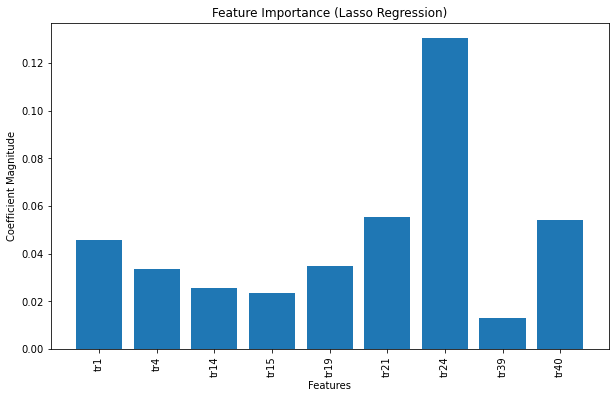

Classification report for final model:


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.05)  # You can tune the regularization strength (alpha) as needed
lasso.fit(X_train_scaled, y_train)

# Select features with non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0]
print(selected_features)

# Train final model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Extract coefficients of selected features
lasso_coefficients = lasso.coef_[lasso.coef_ != 0]
# Plot the importance of selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features, lasso_coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance (Lasso Regression)')
plt.xticks(rotation=90)
plt.show()

# Train your final model using X_train_selected and y_train
# Evaluate the model on X_test_selected and y_test
"""
pTRAQ3 pTRAQ11 pTRAQ41 pTRAQ4 pTRAQ1 pTRAQ28 pTRAQ26 pTRAQ24 pTRAQ14 and pTRAQ7.
"""

from sklearn.metrics import classification_report

# Train your final model using X_train_selected and y_train
lasso.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test_selected)

# Print the classification report
print("Classification report for final model:")
print(classification_report(y_test, y_pred))


In [63]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X contains your features and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the number of features to select (you can adjust this based on experimentation)
num_features = 10

# Initialize SelectKBest with ANOVA F-value as the scoring function
selector = SelectKBest(score_func=f_classif, k=num_features)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['tr8', 'tr14', 'tr15', 'tr21', 'tr24', 'tr28', 'tr31', 'tr33', 'tr34',
       'tr40'],
      dtype='object')


In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of features to select (you can adjust this based on experimentation)
num_features = 20

# Create a model (e.g., Logistic Regression)
model = LogisticRegression()

# Create RFE object with the model and desired number of features
rfe = RFE(model, n_features_to_select=num_features)

# Fit RFE to the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

selected_questions = ptraq_questions[ptraq_questions['question_code'].isin(selected_features)]
selected_questions

Selected Features: Index(['tr1', 'tr2', 'tr4', 'tr10', 'tr13', 'tr17', 'tr18', 'tr19', 'tr21',
       'tr24', 'tr25', 'tr28', 'tr32', 'tr33', 'tr34', 'tr35', 'tr39', 'tr40',
       'tr41', 'tr42'],
      dtype='object')


,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
0,A,A1,pTRAQ1,Je ne prête pas vraiment attention aux détails,I don't really pay attention to details,tr1,Often fails to give close attention to details...,inattention
1,A,A2,pTRAQ2,On me reproche des imprécisions dans mon travail,I have been accused of inaccuracies in my work,tr2,Often fails to give close attention to details...,inattention
3,B,B1,pTRAQ4,J’ai du mal à maintenir mon attention au travail,I have trouble maintaining my attention at work.,tr4,Often has difficulty sustaining attention in t...,inattention
9,D,D2,pTRAQ10,J’ai des difficultés à mener mes tâches (profe...,"I have difficulty completing my tasks (work, h...",tr10,Often does not follow through on instructions ...,inattention
12,E,E2,pTRAQ13,Mon travail est souvent brouillon ou désorganisé,My work is often messy or disorganized,tr13,Often has difficulty organizing tasks and acti...,inattention
16,F,F3,pTRAQ17,J’ai tendance à fonctionner à la dernière minute,I tend to operate at the last minute,tr17,"Often avoids, dislikes, or is reluctant to eng...",inattention
17,G (I),G1 (I3),pTRAQ18,Je perds souvent des objets nécessaires à mon ...,I often lose things I need for my daily life,tr18,Often loses things necessary for tasks or acti...,inattention
18,G,G2,pTRAQ19,Je perds souvent des objets nécessaires à mon ...,I often lose things I need for my work,tr19,Often loses things necessary for tasks or acti...,inattention
20,H,H1,pTRAQ21,Je suis facilement distrait par mon environnement,I am easily distracted by my environment,tr21,Is often easily distracted by extraneous stimu...,inattention
23,I,I1,pTRAQ24,Je suis souvent sujet à des oublis dans ma vie...,I am often subject to forgetfulness in my dail...,tr24,"Is often forgetful in daily activities (e.g., ...",inattention


In [80]:
selected_questions = ptraq_questions[ptraq_questions['question_code'].isin(['tr34', 'tr12', 'tr33', 'tr3', 'tr23', 'tr26', 'tr22', 'tr1', 'tr38', 'tr28', 'tr16'])]
selected_questions

,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
0,A,A1,pTRAQ1,Je ne prête pas vraiment attention aux détails,I don't really pay attention to details,tr1,Often fails to give close attention to details...,inattention
2,A,A3,pTRAQ3,Je fais souvent des fautes d’étourderie dans m...,I often make careless mistakes in my activities,tr3,Often fails to give close attention to details...,inattention
11,E,E1,pTRAQ12,J’ai des difficultés à organiser mon temps,I have difficulty organizing my time,tr12,Often has difficulty organizing tasks and acti...,inattention
15,F,F2,pTRAQ16,Je rencontre souvent des difficultés à réalise...,I often find it difficult to do work that requ...,tr16,"Often avoids, dislikes, or is reluctant to eng...",inattention
21,H,H2,pTRAQ22,Je suis souvent distrait par des pensées sans ...,I am often distracted by thoughts unrelated to...,tr22,Is often easily distracted by extraneous stimu...,inattention
22,H (C),H3 (C3),pTRAQ23,Je suis facilement distrait parce qu’il se pas...,I am easily distracted by what is going on aro...,tr23,Is often easily distracted by extraneous stimu...,inattention
25,"a (c, d)","a1 (c3, d2)",pTRAQ26,Il m’arrive souvent de remuer les mains ou les...,I often wiggle my hands or feet on my seat,tr26,Often fidgets with or taps hands or feet or sq...,hyperactivity/impulsivity
27,b,b1,pTRAQ28,Je quitte souvent ma place sans nécessité lors...,I often leave my seat unnecessarily during a m...,tr28,Often leaves seat in situations when remaining...,hyperactivity/impulsivity
32,d,D1,pTRAQ33,J’ai du mal à tenir en place lorsque la situat...,I find it hard to stay in place when the situa...,tr33,Often unable to play or engage in leisure acti...,hyperactivity/impulsivity
33,e,e1,pTRAQ34,Mon entourage trouve que je suis difficile à s...,My entourage finds me difficult to follow.,tr34,"Is often “on the go,” acting as if “driven by ...",hyperactivity/impulsivity


In [85]:
selected_questions = ptraq_questions[ptraq_questions['question_code'].isin(['tr28', 'tr8', 'tr36', 'tr17', 'tr41', 'tr6', 'tr14', 'tr19', 'tr40',
       'tr35', 'tr4', 'tr15', 'tr11', 'tr20', 'tr18'])]
selected_questions

,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
3,B,B1,pTRAQ4,J’ai du mal à maintenir mon attention au travail,I have trouble maintaining my attention at work.,tr4,Often has difficulty sustaining attention in t...,inattention
5,B,B3,pTRAQ6,J’ai du mal à rester concentré durant les conv...,I have trouble staying focused during conversa...,tr6,Often has difficulty sustaining attention in t...,inattention
7,C,C2,pTRAQ8,"J’ai souvent l’esprit ailleurs, même en l’abse...","My mind is often elsewhere, even when there is...",tr8,Often does not seem to listen when spoken to d...,inattention
10,D,D3,pTRAQ11,J’ai des difficultés à rester concentré lors d...,I have difficulty staying focused during my ac...,tr11,Often does not follow through on instructions ...,inattention
13,E,E3,pTRAQ14,Il m’est difficile d’organiser des taches néce...,It is difficult for me to organize tasks that ...,tr14,Often has difficulty organizing tasks and acti...,inattention
14,F,F1,pTRAQ15,J’ ai tendance à éviter les taches nécessitant...,I tend to avoid tasks that require sustained m...,tr15,"Often avoids, dislikes, or is reluctant to eng...",inattention
16,F,F3,pTRAQ17,J’ai tendance à fonctionner à la dernière minute,I tend to operate at the last minute,tr17,"Often avoids, dislikes, or is reluctant to eng...",inattention
17,G (I),G1 (I3),pTRAQ18,Je perds souvent des objets nécessaires à mon ...,I often lose things I need for my daily life,tr18,Often loses things necessary for tasks or acti...,inattention
18,G,G2,pTRAQ19,Je perds souvent des objets nécessaires à mon ...,I often lose things I need for my work,tr19,Often loses things necessary for tasks or acti...,inattention
19,G,G3,pTRAQ20,Je perds souvent des objets nécessaires à mes ...,I often lose things I need for my activities/l...,tr20,Often loses things necessary for tasks or acti...,inattention


In [83]:
selected_questions = ptraq_questions[~ptraq_questions['question_code'].isin(['tr34', 'tr12', 'tr33', 'tr3', 'tr23', 'tr26', 'tr22', 'tr1', 'tr38', 'tr28', 'tr16'])]
selected_questions

,Critère DSM-5,ID Critère,ID Projet,French Item (Validated),English Item (Author's suggestion),question_code,dsm5_criteria,symptom_category
0,A,A1,pTRAQ1,Je ne prête pas vraiment attention aux détails,I don't really pay attention to details,tr1,Often fails to give close attention to details...,inattention
1,A,A2,pTRAQ2,On me reproche des imprécisions dans mon travail,I have been accused of inaccuracies in my work,tr2,Often fails to give close attention to details...,inattention
2,A,A3,pTRAQ3,Je fais souvent des fautes d’étourderie dans m...,I often make careless mistakes in my activities,tr3,Often fails to give close attention to details...,inattention
4,B,B2,pTRAQ5,J’ai des difficultés à rester concentré pendan...,I have difficulty staying focused while readin...,tr5,Often has difficulty sustaining attention in t...,inattention
5,B,B3,pTRAQ6,J’ai du mal à rester concentré durant les conv...,I have trouble staying focused during conversa...,tr6,Often has difficulty sustaining attention in t...,inattention
6,C,C1,pTRAQ7,Mes proches me reprochent de ne pas les écoute...,My relatives blame me for not listening to the...,tr7,Often does not seem to listen when spoken to d...,inattention
8,D,D1,pTRAQ9,J’ai des difficultés à me conformer aux consignes,I have difficulty complying with instructions,tr9,Often does not follow through on instructions ...,inattention
9,D,D2,pTRAQ10,J’ai des difficultés à mener mes tâches (profe...,"I have difficulty completing my tasks (work, h...",tr10,Often does not follow through on instructions ...,inattention
10,D,D3,pTRAQ11,J’ai des difficultés à rester concentré lors d...,I have difficulty staying focused during my ac...,tr11,Often does not follow through on instructions ...,inattention
11,E,E1,pTRAQ12,J’ai des difficultés à organiser mon temps,I have difficulty organizing my time,tr12,Often has difficulty organizing tasks and acti...,inattention
